---

# Oracle db lekérdezés elemzés 

 ## A pandas és cx_Oracle csomagok használatával
 
 ---

,OWNER,TABLE_NAME,NUM_ROWS,BLOCKS,AVG_ROW_LEN
0,U23442,KL_TMP,0,0,0
1,U23442,KL_001,0,0,0
2,U23442,KL,0,0,0


,OWNER,TABLE_NAME,NUM_ROWS,BLOCKS,AVG_ROW_LEN
0,U23442,KL_TMP,0,0,0
1,U23442,KL_001,0,0,0
2,U23442,KL,0,0,0


OWNER,TABLE_NAME,NUM_ROWS,BLOCKS,AVG_ROW_LEN
U23442,KL_TMP,$0,0,0.00%
U23442,KL_001,$0,0,0.00%
U23442,KL,$0,0,0.00%


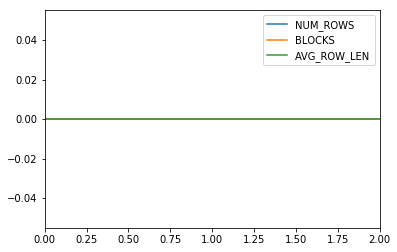

In [47]:
# KLajos
#import sqlalchemy
import numpy as np
import pandas as pd
import cx_Oracle
from pprint import pprint 
#import seaborn as sns
from IPython.display import HTML
%matplotlib inline

import matplotlib.pyplot as plt


# pd.set_option("display.max.columns", None)  ## teljes szélességben mindent megjelenít

# adatbázishoz kapcsolódás
conn = cx_Oracle.connect("u2", 'Il', "DB") ## FIGYI !!!

#print("cx_Oracle version :", cx_Oracle.version)
#print("Database version:", conn.version)
#print("Client version:", cx_Oracle.clientversion())
#print('------------------')

# Eredméynhez kuzor létrhozás
cursor = conn.cursor()

# paraméter változó deffiniálása
firstName = "U23442"

# lekérdezés futtatása
sql = """SELECT * FROM all_tables
         WHERE owner = :fn """
cursor.execute(sql, fn = firstName)

### 1. eredmény készlet bejárása
#for row in cursor:
#    print(row)

## 2.  
#rows = cursor.fetchall()
#for row in rows:
#    print(row)
    
## 3.    
#pprint(cursor.fetchall())    
query = """SELECT owner, table_name, NUM_ROWS, BLOCKS, AVG_ROW_LEN FROM all_tables
         WHERE owner = 'U23442' """

df_ora = pd.read_sql(query, con=conn)

#print(df_ora.to_html(classes=["table-bordered", "table-striped", "table-hover", "isi"]))

def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

styles = [
    hover(),
    dict(selector="th", props=[("font-size", "150%"),
                               ("text-align", "center")]),
    dict(selector="caption", props=[("caption-side", "bottom")])
]
html = (df_ora.style.set_table_styles(styles)
          .set_caption("Lajos  minta"))


megjegyzes = '''
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

print(df_ora.style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'lawngreen',                       
                                    'border-color': 'white'}))
'''


## erőforrás felszabadítás
cursor.close()
conn.close()

#### Megjelenítések
#html
display(df_ora) 
display(html) 

format_dict = {'NUM_ROWS':'${0:,.0f}',  'AVG_ROW_LEN': '{:.2%}'}

display(df_ora.style
 .format(format_dict)
 .hide_index()
 .bar(color='#FFA07A', vmin=100_000, subset=['NUM_ROWS'], align='zero')
 .bar(color='lightgreen', vmin=0, subset=['AVG_ROW_LEN'], align='zero')
 .set_caption('Minta riport'))



html = df.to_html() 
  
# eredmény html-be mentése
text_file = open("index.html", "w") 
text_file.write(html) 
text_file.close() 

df_ora.plot()
#df_ora.plot(kind='scatter',x='num_children',y='num_pets',color='red')

###    gca stands for 'get current axis'
#ax = plt.gca()
#df.plot(kind='line',x='name',y='num_children',ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()
# plt.savefig('output.png')  ## mentés
